<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/stratifiedkfoldcx_pipiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Données déséquilibrées

In [20]:
Cl = '/content/cx_pipiensdés.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [21]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,1,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-5.360864,3

In [22]:
X = data.loc[:, data.columns != 'Cx_pipiens']
Y = data.Cx_pipiens

In [23]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-5.833954,35.759465,0.000000,0.000000,0.000000,0.000000,1.795786,0,0,0,0,0,0,0,10,0,0,90,2340,810,30,40,88,0,0,88,1560,3120,627,131,76,0,14949,528,46,14,95,1,0,96,...,26.100000,22.700001,19.400000,16.600000,8.3,9.5,11.3,12.7,14.900000,18.299999,20.799999,21.299999,19.900000,16.500000,13.300000,10.4,1.11,1.15,1.21,1.29,1.48,1.74,1.97,2.07,1.93,1.64,1.37,1.21,3.6,4.4,4.2,3.9,3.7,3.7,3.6,3.3,3.4,3.5,3.8,3.9
356,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
357,-

In [24]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
355    1
356    1
357    1
358    1
359    1
Name: Cx_pipiens, Length: 360, dtype: int64

In [25]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)

# Modèle Complet

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

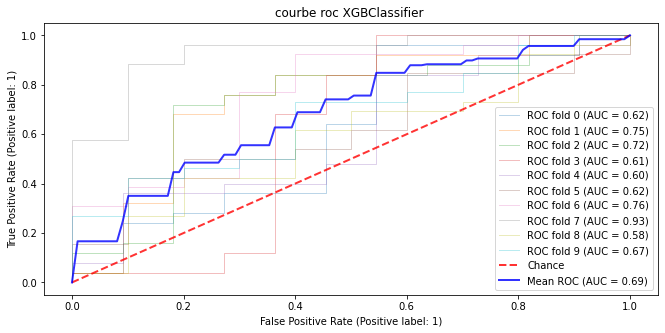

Accuracy: [0.75       0.77777778 0.69444444 0.80555556 0.69444444 0.69444444
 0.83333333 0.88888889 0.61111111 0.66666667]
moy_accuracy: 0.74
precision: [0.75       0.79310345 0.73333333 0.78125    0.76923077 0.75862069
 0.85714286 0.89285714 0.71428571 0.79166667]
moy_precision: 0.78
sensibilité : [0.96       0.92       0.88       1.         0.8        0.84615385
 0.92307692 0.96153846 0.76923077 0.73076923]
moy_sensibilité: 0.88
spécificité : [0.27272727 0.45454545 0.27272727 0.36363636 0.45454545 0.3
 0.6        0.7        0.2        0.5       ]
moy_spécificité: 0.41
MCC : [ 0.34112115  0.43593612  0.18877596  0.53300179  0.26178516  0.1654051
  0.56354451  0.71271806 -0.03314968  0.2192645 ]
MCC: 0.34
balanced_accuracy : [0.61636364 0.68727273 0.57636364 0.68181818 0.62727273 0.57307692
 0.76153846 0.83076923 0.48461538 0.61538462]
balanced_accuracy: 0.65
roc_auc : [0.61818182 0.74909091 0.72363636 0.61454545 0.59636364 0.61923077
 0.76153846 0.93076923 0.57692308 0.66923077]
roc_a

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

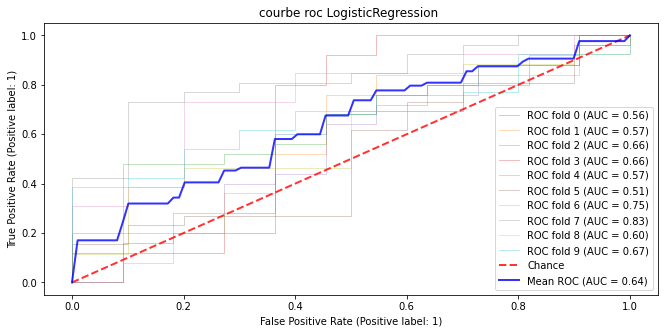

Accuracy: [0.61111111 0.55555556 0.63888889 0.63888889 0.55555556 0.52777778
 0.66666667 0.77777778 0.58333333 0.58333333]
moy_accuracy: 0.61
precision: [0.76190476 0.73684211 0.73076923 0.8        0.73684211 0.71428571
 0.88888889 0.90909091 0.76190476 0.86666667]
moy_precision: 0.79
sensibilité : [0.64       0.56       0.76       0.64       0.56       0.57692308
 0.61538462 0.76923077 0.61538462 0.5       ]
moy_sensibilité: 0.62
spécificité : [0.54545455 0.54545455 0.36363636 0.63636364 0.54545455 0.4
 0.8        0.8        0.5        0.8       ]
moy_spécificité: 0.59
MCC : [ 0.17328005  0.09730393  0.12715279  0.25619595  0.09730393 -0.0209657
  0.3721042   0.52299758  0.10482848  0.27255406]
MCC: 0.20
balanced_accuracy : [0.59272727 0.55272727 0.56181818 0.63818182 0.55272727 0.48846154
 0.70769231 0.78461538 0.55769231 0.65      ]
balanced_accuracy: 0.61
roc_auc : [0.57090909 0.54545455 0.74909091 0.66181818 0.57090909 0.50384615
 0.75       0.81538462 0.58846154 0.67307692]
roc_a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

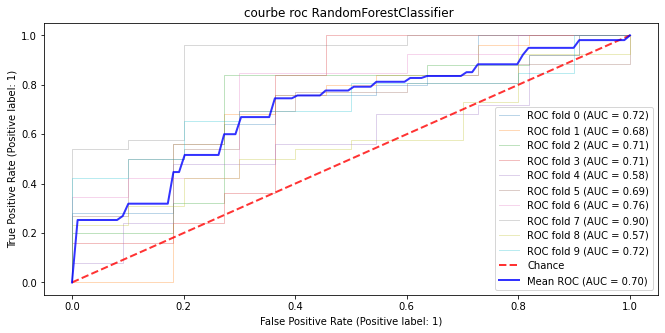

Accuracy: [0.77777778 0.72222222 0.66666667 0.75       0.66666667 0.72222222
 0.72222222 0.83333333 0.69444444 0.63888889]
moy_accuracy: 0.72
precision: [0.75757576 0.75       0.6969697  0.73529412 0.70967742 0.71428571
 0.77419355 0.80645161 0.72413793 0.73333333]
moy_precision: 0.74
sensibilité : [1.         0.96       0.92       1.         0.88       0.92307692
 0.92307692 1.         0.80769231 0.84615385]
moy_sensibilité: 0.93
spécificité : [0.18181818 0.18181818 0.09090909 0.18181818 0.18181818 0.
 0.3        0.4        0.2        0.2       ]
moy_spécificité: 0.19
MCC : [ 0.45454545  0.34112115  0.01818182  0.36563621  0.08234111 -0.10482848
  0.26178516  0.57008771  0.10958981  0.05547002]
MCC: 0.22
balanced_accuracy : [0.63636364 0.57090909 0.50545455 0.59090909 0.55090909 0.46153846
 0.58076923 0.68076923 0.52307692 0.52307692]
balanced_accuracy: 0.56
roc_auc : [0.72363636 0.66909091 0.70909091 0.69454545 0.6        0.73076923
 0.76153846 0.87692308 0.56153846 0.67307692]
roc_a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

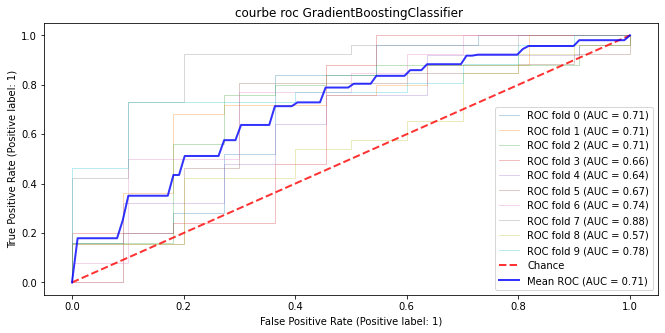

Accuracy: [0.77777778 0.69444444 0.72222222 0.83333333 0.66666667 0.66666667
 0.72222222 0.83333333 0.63888889 0.69444444]
moy_accuracy: 0.72
precision: [0.77419355 0.73333333 0.75862069 0.80645161 0.74074074 0.71875
 0.78571429 0.85714286 0.74074074 0.8       ]
moy_precision: 0.77
sensibilité : [0.96       0.88       0.88       1.         0.8        0.88461538
 0.84615385 0.92307692 0.76923077 0.76923077]
moy_sensibilité: 0.87
spécificité : [0.36363636 0.27272727 0.36363636 0.45454545 0.36363636 0.1
 0.4        0.6        0.3        0.5       ]
moy_spécificité: 0.37
MCC : [ 0.43107994  0.18877596  0.2835701   0.60544935  0.17407766 -0.02192645
  0.26519742  0.56354451  0.07161149  0.26178516]
MCC: 0.28
balanced_accuracy : [0.66181818 0.57636364 0.62181818 0.72727273 0.58181818 0.49230769
 0.62307692 0.76153846 0.53461538 0.63461538]
balanced_accuracy: 0.62
roc_auc : [0.70545455 0.70909091 0.70545455 0.65818182 0.63636364 0.66923077
 0.73846154 0.88076923 0.56538462 0.78461538]
roc_auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

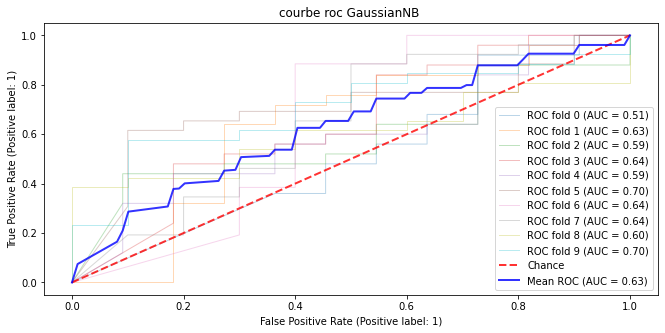

Accuracy: [0.44444444 0.47222222 0.52777778 0.55555556 0.47222222 0.55555556
 0.38888889 0.44444444 0.52777778 0.52777778]
moy_accuracy: 0.49
precision: [0.69230769 0.8        0.75       0.8        0.8        0.91666667
 0.7        0.75       0.8        0.90909091]
moy_precision: 0.79
sensibilité : [0.36       0.32       0.48       0.48       0.32       0.42307692
 0.26923077 0.34615385 0.46153846 0.38461538]
moy_sensibilité: 0.38
spécificité : [0.63636364 0.81818182 0.63636364 0.72727273 0.81818182 0.9
 0.7        0.7        0.7        0.9       ]
moy_spécificité: 0.75
MCC : [-0.00348737  0.14211194  0.10787198  0.19366593  0.14211194  0.30697031
 -0.03076923  0.0438529   0.14675988  0.27674431]
MCC: 0.13
balanced_accuracy : [0.49818182 0.56909091 0.55818182 0.60363636 0.56909091 0.66153846
 0.48461538 0.52307692 0.58076923 0.64230769]
balanced_accuracy: 0.57
roc_auc : [0.51272727 0.63272727 0.58545455 0.64363636 0.58727273 0.7
 0.64423077 0.64423077 0.60384615 0.70384615]
roc_auc: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

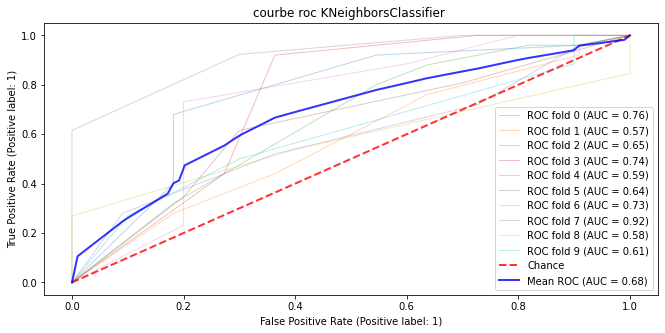

Accuracy: [0.77777778 0.63888889 0.72222222 0.77777778 0.58333333 0.66666667
 0.75       0.86111111 0.61111111 0.61111111]
moy_accuracy: 0.70
precision: [0.79310345 0.73076923 0.75862069 0.75757576 0.69230769 0.75
 0.79310345 0.88888889 0.6875     0.75      ]
moy_precision: 0.76
sensibilité : [0.92       0.76       0.88       1.         0.72       0.80769231
 0.88461538 0.92307692 0.84615385 0.69230769]
moy_sensibilité: 0.84
spécificité : [0.45454545 0.36363636 0.36363636 0.27272727 0.27272727 0.3
 0.4        0.7        0.         0.4       ]
moy_spécificité: 0.35
MCC : [ 0.43593612  0.12715279  0.2835701   0.45454545 -0.00747958  0.11602387
  0.32210467  0.64450339 -0.2192645   0.0877058 ]
MCC: 0.22
balanced_accuracy : [0.68727273 0.56181818 0.62181818 0.63636364 0.49636364 0.55384615
 0.64230769 0.81153846 0.42307692 0.54615385]
balanced_accuracy: 0.60
roc_auc : [0.75818182 0.57272727 0.65272727 0.74363636 0.58909091 0.63846154
 0.73461538 0.91538462 0.57692308 0.60576923]
roc_auc: 0

In [27]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv =StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

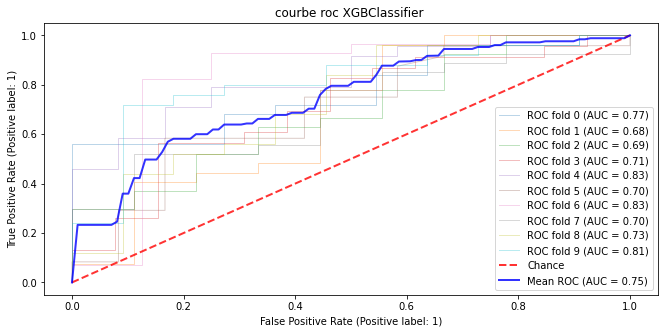

Accuracy: [0.72222222 0.77777778 0.66666667 0.72222222 0.77777778 0.63888889
 0.83333333 0.72222222 0.72222222 0.77777778]
moy_accuracy: 0.74
precision: [0.77777778 0.82758621 0.77777778 0.72413793 0.76666667 0.72
 0.86666667 0.81481481 0.77777778 0.81481481]
moy_precision: 0.79
sensibilité : [0.84       0.88888889 0.77777778 0.91304348 0.95833333 0.75
 0.92857143 0.81481481 0.84       0.88      ]
moy_sensibilité: 0.86
spécificité : [0.45454545 0.44444444 0.33333333 0.38461538 0.41666667 0.41666667
 0.5        0.44444444 0.45454545 0.54545455]
moy_spécificité: 0.44
MCC : [0.31333978 0.3646984  0.11111111 0.36124878 0.47434165 0.17056057
 0.47809144 0.25925926 0.31333978 0.45260191]
MCC: 0.33
balanced_accuracy : [0.64727273 0.66666667 0.55555556 0.64882943 0.6875     0.58333333
 0.71428571 0.62962963 0.64727273 0.71272727]
balanced_accuracy: 0.65
roc_auc : [0.77454545 0.68312757 0.6872428  0.7090301  0.82986111 0.69618056
 0.83482143 0.69547325 0.73454545 0.81090909]
roc_auc: 0.75
cohen

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

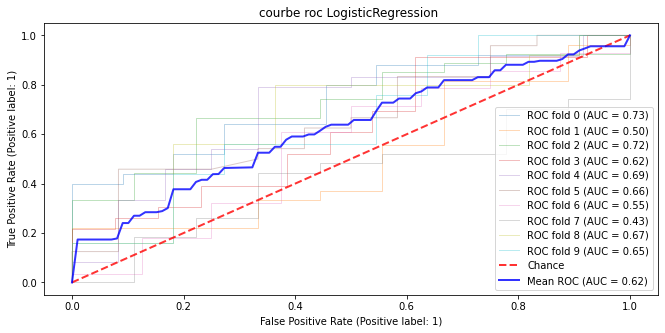

Accuracy: [0.66666667 0.5        0.66666667 0.58333333 0.63888889 0.61111111
 0.66666667 0.5        0.69444444 0.58333333]
moy_accuracy: 0.61
precision: [0.84210526 0.71428571 0.82608696 0.75       0.78947368 0.72727273
 0.80769231 0.76470588 0.81818182 0.72727273]
moy_precision: 0.78
sensibilité : [0.64       0.55555556 0.7037037  0.52173913 0.625      0.66666667
 0.75       0.48148148 0.72       0.64      ]
moy_sensibilité: 0.63
spécificité : [0.72727273 0.33333333 0.55555556 0.69230769 0.66666667 0.5
 0.375      0.55555556 0.63636364 0.45454545]
moy_spécificité: 0.55
MCC : [ 0.33888611 -0.09759001  0.2337232   0.20690424  0.27541132  0.16116459
  0.11602387  0.03212463  0.33673199  0.08933706]
MCC: 0.17
balanced_accuracy : [0.68363636 0.44444444 0.62962963 0.60702341 0.64583333 0.58333333
 0.5625     0.51851852 0.67818182 0.54727273]
balanced_accuracy: 0.59
roc_auc : [0.72727273 0.51028807 0.72839506 0.66220736 0.70138889 0.67534722
 0.55357143 0.43209877 0.66909091 0.63636364]
roc_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

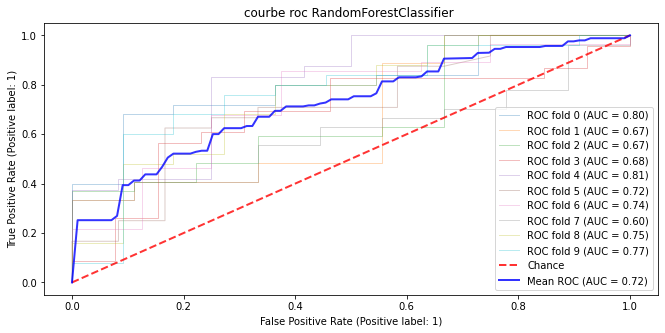

Accuracy: [0.75       0.80555556 0.80555556 0.61111111 0.75       0.66666667
 0.77777778 0.66666667 0.75       0.75      ]
moy_accuracy: 0.73
precision: [0.73529412 0.8125     0.78787879 0.63636364 0.72727273 0.74074074
 0.79411765 0.75757576 0.77419355 0.77419355]
moy_precision: 0.75
sensibilité : [1.         0.96296296 1.         0.91304348 1.         0.875
 0.96428571 0.92592593 0.96       0.96      ]
moy_sensibilité: 0.96
spécificité : [0.18181818 0.33333333 0.22222222 0.07692308 0.25       0.41666667
 0.25       0.11111111 0.36363636 0.27272727]
moy_spécificité: 0.25
MCC : [ 0.36563621  0.40824829  0.42008403 -0.08178608  0.5         0.27216553
  0.16205093  0.05802589  0.34112115  0.43107994]
MCC: 0.29
balanced_accuracy : [0.59090909 0.66666667 0.66666667 0.47324415 0.625      0.60416667
 0.54464286 0.48148148 0.59636364 0.66181818]
balanced_accuracy: 0.59
roc_auc : [0.77818182 0.68312757 0.69958848 0.64882943 0.85069444 0.69965278
 0.73660714 0.6255144  0.76       0.78181818]
ro

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

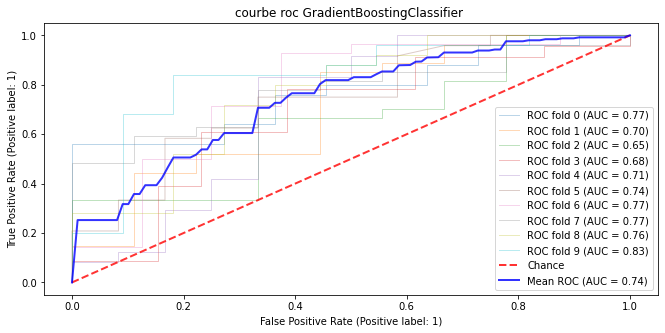

Accuracy: [0.72222222 0.75       0.66666667 0.66666667 0.80555556 0.66666667
 0.83333333 0.75       0.75       0.77777778]
moy_accuracy: 0.74
precision: [0.74193548 0.82142857 0.75862069 0.67741935 0.77419355 0.73076923
 0.84375    0.82142857 0.83333333 0.79310345]
moy_precision: 0.78
sensibilité : [0.92       0.85185185 0.81481481 0.91304348 1.         0.79166667
 0.96428571 0.85185185 0.8        0.92      ]
moy_sensibilité: 0.88
spécificité : [0.27272727 0.44444444 0.22222222 0.23076923 0.41666667 0.41666667
 0.375      0.44444444 0.63636364 0.45454545]
moy_spécificité: 0.39
MCC : [0.25671052 0.3086067  0.04052204 0.1997409  0.56796183 0.2192645
 0.44883281 0.3086067  0.42640143 0.43593612]
MCC: 0.32
balanced_accuracy : [0.59636364 0.64814815 0.51851852 0.57190635 0.70833333 0.60416667
 0.66964286 0.64814815 0.71818182 0.68727273]
balanced_accuracy: 0.64
roc_auc : [0.77090909 0.7037037  0.65020576 0.67558528 0.70833333 0.74131944
 0.77232143 0.76954733 0.76363636 0.83272727]
roc_auc:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

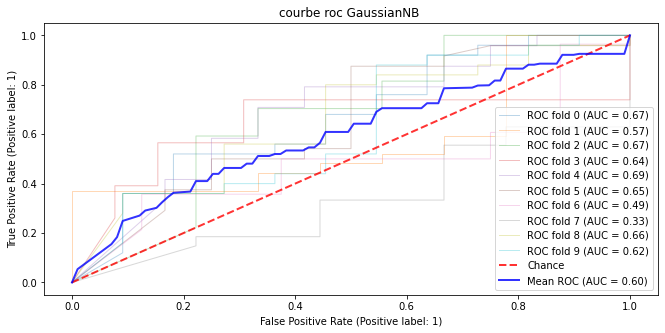

Accuracy: [0.52777778 0.5        0.52777778 0.66666667 0.55555556 0.5
 0.41666667 0.27777778 0.61111111 0.47222222]
moy_accuracy: 0.51
precision: [0.9        0.90909091 0.85714286 0.86666667 0.78571429 0.75
 0.76923077 0.55555556 0.82352941 0.75      ]
moy_precision: 0.80
sensibilité : [0.36       0.37037037 0.44444444 0.56521739 0.45833333 0.375
 0.35714286 0.18518519 0.56       0.36      ]
moy_sensibilité: 0.40
spécificité : [0.90909091 0.88888889 0.77777778 0.84615385 0.75       0.75
 0.625      0.55555556 0.72727273 0.72727273]
moy_spécificité: 0.76
MCC : [ 0.27674431  0.24370872  0.19738551  0.40078757  0.20145574  0.125
 -0.01545612 -0.25925926  0.26506933  0.08528029]
MCC: 0.15
balanced_accuracy : [0.63454545 0.62962963 0.61111111 0.70568562 0.60416667 0.5625
 0.49107143 0.37037037 0.64363636 0.54363636]
balanced_accuracy: 0.58
roc_auc : [0.66727273 0.57201646 0.67078189 0.63879599 0.6875     0.64756944
 0.48660714 0.33333333 0.66       0.62181818]
roc_auc: 0.60
cohen_kappa_scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

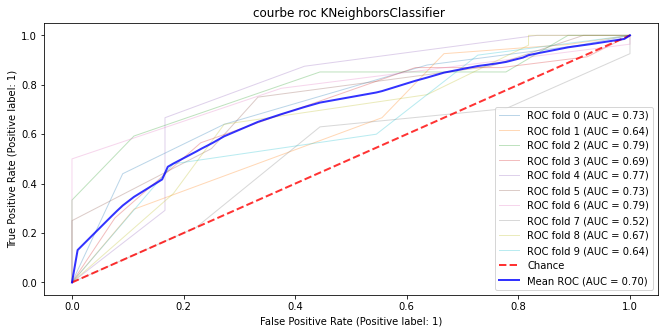

Accuracy: [0.72222222 0.77777778 0.77777778 0.69444444 0.77777778 0.72222222
 0.75       0.58333333 0.63888889 0.72222222]
moy_accuracy: 0.72
precision: [0.75862069 0.80645161 0.85185185 0.71428571 0.80769231 0.81818182
 0.78787879 0.73076923 0.73076923 0.74193548]
moy_precision: 0.77
sensibilité : [0.88       0.92592593 0.85185185 0.86956522 0.875      0.75
 0.92857143 0.7037037  0.76       0.92      ]
moy_sensibilité: 0.85
spécificité : [0.36363636 0.33333333 0.55555556 0.38461538 0.58333333 0.66666667
 0.125      0.22222222 0.36363636 0.27272727]
moy_spécificité: 0.39
MCC : [ 0.2835701   0.32461723  0.40740741  0.29366622  0.48238191  0.40291148
  0.0805823  -0.07161149  0.12715279  0.25671052]
MCC: 0.26
balanced_accuracy : [0.62181818 0.62962963 0.7037037  0.6270903  0.72916667 0.70833333
 0.52678571 0.46296296 0.56181818 0.59636364]
balanced_accuracy: 0.62
roc_auc : [0.73454545 0.63786008 0.79012346 0.69397993 0.77430556 0.73090278
 0.78794643 0.52263374 0.67090909 0.64      ]
roc

In [28]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

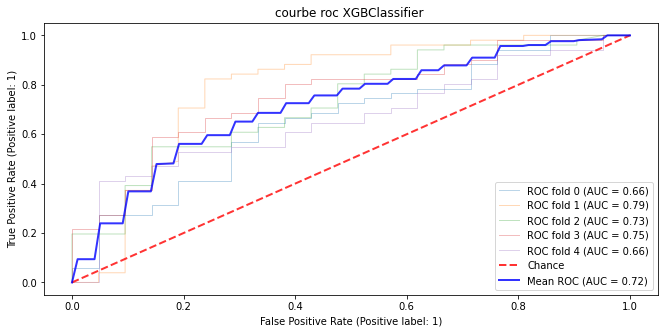

Accuracy: [0.69444444 0.77777778 0.66666667 0.73611111 0.625     ]
moy_accuracy: 0.70
precision: [0.73770492 0.77777778 0.78723404 0.80769231 0.74      ]
moy_precision: 0.77
sensibilité : [0.88235294 0.96078431 0.7254902  0.82352941 0.7254902 ]
moy_sensibilité: 0.82
spécificité : [0.23809524 0.33333333 0.52380952 0.52380952 0.38095238]
moy_spécificité: 0.40
MCC : [0.15217164 0.40422604 0.23801131 0.35247761 0.1050301 ]
MCC: 0.25
balanced_accuracy : [0.56022409 0.64705882 0.62464986 0.67366947 0.55322129]
balanced_accuracy: 0.61
roc_auc : [0.66106443 0.79131653 0.72782446 0.75256769 0.66106443]
roc_auc: 0.72
cohen_kappa_scorec : [0.14006515 0.35353535 0.23607427 0.35227273 0.10497238]
cohen_kappa_scorec: 0.24
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

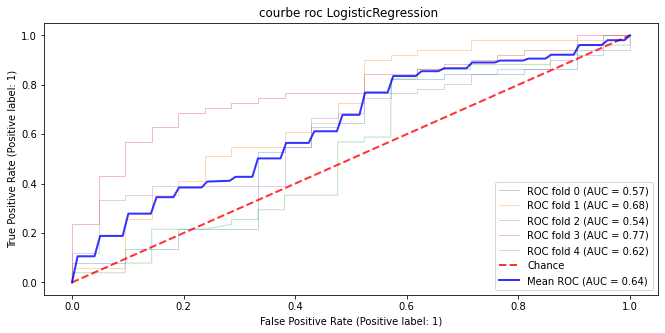

Accuracy: [0.56944444 0.69444444 0.55555556 0.66666667 0.52777778]
moy_accuracy: 0.60
precision: [0.75       0.78431373 0.74358974 0.90909091 0.75757576]
moy_precision: 0.79
sensibilité : [0.58823529 0.78431373 0.56862745 0.58823529 0.49019608]
moy_sensibilité: 0.60
spécificité : [0.52380952 0.47619048 0.52380952 0.85714286 0.61904762]
moy_spécificité: 0.60
MCC : [0.10249001 0.2605042  0.084324   0.40628835 0.09965563]
MCC: 0.19
balanced_accuracy : [0.55602241 0.6302521  0.54621849 0.72268908 0.55462185]
balanced_accuracy: 0.60
roc_auc : [0.55555556 0.68347339 0.554155   0.78338002 0.60690943]
roc_auc: 0.64
cohen_kappa_scorec : [0.09708738 0.2605042  0.07913669 0.3557047  0.08724832]
cohen_kappa_scorec: 0.18
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

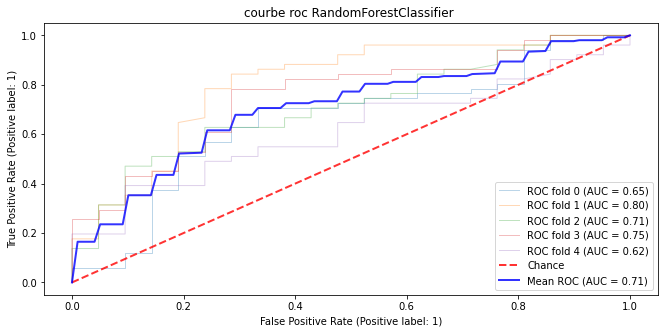

Accuracy: [0.75       0.72222222 0.72222222 0.70833333 0.63888889]
moy_accuracy: 0.71
precision: [0.74626866 0.74242424 0.73134328 0.77192982 0.71186441]
moy_precision: 0.74
sensibilité : [0.98039216 0.98039216 0.96078431 0.90196078 0.82352941]
moy_sensibilité: 0.93
spécificité : [0.14285714 0.14285714 0.14285714 0.23809524 0.19047619]
moy_spécificité: 0.17
MCC : [0.24456525 0.18531298 0.24456525 0.12298801 0.01655003]
MCC: 0.16
balanced_accuracy : [0.56162465 0.55182073 0.55182073 0.61764706 0.5070028 ]
balanced_accuracy: 0.56
roc_auc : [0.64519141 0.79785247 0.70728291 0.74696545 0.62558357]
roc_auc: 0.70
cohen_kappa_scorec : [0.16176471 0.19148936 0.16176471 0.2173913  0.03846154]
cohen_kappa_scorec: 0.15
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

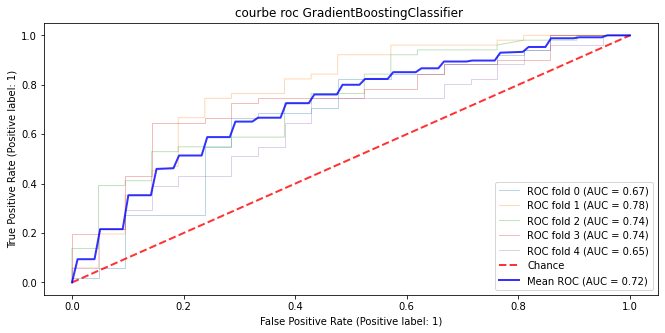

Accuracy: [0.70833333 0.80555556 0.72222222 0.68055556 0.63888889]
moy_accuracy: 0.71
precision: [0.734375   0.80327869 0.78181818 0.75925926 0.74509804]
moy_precision: 0.76
sensibilité : [0.92156863 0.96078431 0.84313725 0.80392157 0.74509804]
moy_sensibilité: 0.85
spécificité : [0.19047619 0.42857143 0.42857143 0.38095238 0.38095238]
moy_spécificité: 0.36
MCC : [0.16205093 0.49190367 0.29079869 0.19406058 0.12605042]
MCC: 0.25
balanced_accuracy : [0.55602241 0.69467787 0.63585434 0.59243697 0.56302521]
balanced_accuracy: 0.61
roc_auc : [0.67413632 0.77824463 0.73902894 0.73762838 0.64892624]
roc_auc: 0.72
cohen_kappa_scorec : [0.1369863  0.45276873 0.28783383 0.19298246 0.12605042]
cohen_kappa_scorec: 0.24
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

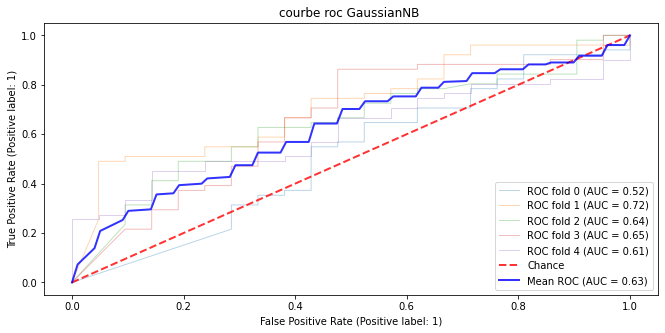

Accuracy: [0.40277778 0.59722222 0.54166667 0.48611111 0.55555556]
moy_accuracy: 0.52
precision: [0.7        0.82352941 0.875      0.81818182 0.80645161]
moy_precision: 0.80
sensibilité : [0.2745098  0.54901961 0.41176471 0.35294118 0.49019608]
moy_sensibilité: 0.42
spécificité : [0.71428571 0.71428571 0.85714286 0.80952381 0.71428571]
moy_spécificité: 0.76
MCC : [-0.01137025  0.2397304   0.25928149  0.1603091   0.18770533]
MCC: 0.17
balanced_accuracy : [0.49439776 0.63165266 0.63445378 0.58123249 0.6022409 ]
balanced_accuracy: 0.59
roc_auc : [0.51540616 0.71661998 0.64005602 0.65266106 0.61064426]
roc_auc: 0.63
cohen_kappa_scorec : [-0.0078125   0.21266968  0.19512195  0.11553785  0.15973742]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

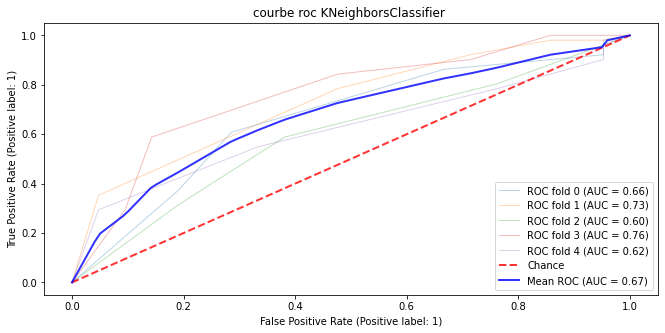

Accuracy: [0.70833333 0.73611111 0.63888889 0.75       0.625     ]
moy_accuracy: 0.69
precision: [0.75862069 0.75806452 0.71929825 0.81132075 0.71428571]
moy_precision: 0.75
sensibilité : [0.8627451  0.92156863 0.80392157 0.84313725 0.78431373]
moy_sensibilité: 0.84
spécificité : [0.33333333 0.28571429 0.23809524 0.52380952 0.23809524]
moy_spécificité: 0.32
MCC : [0.22518867 0.27243468 0.04702564 0.37842784 0.0244998 ]
MCC: 0.19
balanced_accuracy : [0.59803922 0.60364146 0.5210084  0.68347339 0.51120448]
balanced_accuracy: 0.58
roc_auc : [0.6643324  0.73155929 0.59570495 0.76003735 0.62044818]
roc_auc: 0.67
cohen_kappa_scorec : [0.2173913  0.24503311 0.04587156 0.37752161 0.02409639]
cohen_kappa_scorec: 0.18


In [29]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

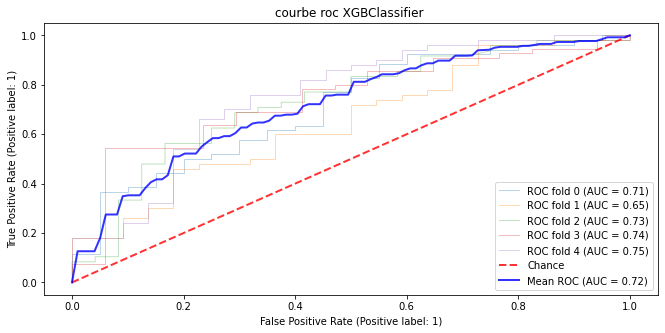

Accuracy: [0.75       0.66666667 0.70833333 0.73611111 0.75      ]
moy_accuracy: 0.72
precision: [0.80357143 0.73214286 0.75471698 0.81034483 0.7962963 ]
moy_precision: 0.78
sensibilité : [0.86538462 0.82       0.83333333 0.85454545 0.86      ]
moy_sensibilité: 0.85
spécificité : [0.45       0.31818182 0.45833333 0.35294118 0.5       ]
moy_spécificité: 0.42
MCC : [0.33978419 0.15310636 0.31195956 0.22264754 0.38297084]
MCC: 0.28
balanced_accuracy : [0.65769231 0.56909091 0.64583333 0.60374332 0.68      ]
balanced_accuracy: 0.63
roc_auc : [0.7125     0.65272727 0.73046875 0.74331551 0.75454545]
roc_auc: 0.72
cohen_kappa_scorec : [0.33606557 0.1496063  0.30769231 0.22095672 0.37931034]
cohen_kappa_scorec: 0.28
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

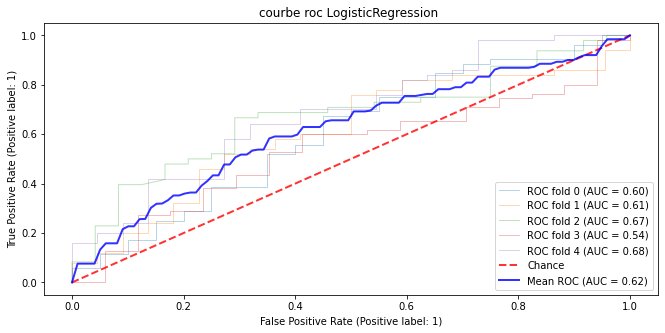

Accuracy: [0.56944444 0.58333333 0.68055556 0.55555556 0.65277778]
moy_accuracy: 0.61
precision: [0.76923077 0.8125     0.82051282 0.76744186 0.79069767]
moy_precision: 0.79
sensibilité : [0.57692308 0.52       0.66666667 0.6        0.68      ]
moy_sensibilité: 0.61
spécificité : [0.55       0.72727273 0.70833333 0.41176471 0.59090909]
moy_spécificité: 0.60
MCC : [0.11409536 0.22922795 0.35478744 0.01018717 0.25444077]
MCC: 0.19
balanced_accuracy : [0.56346154 0.62363636 0.6875     0.50588235 0.63545455]
balanced_accuracy: 0.60
roc_auc : [0.60288462 0.61636364 0.66970486 0.5486631  0.68818182]
roc_auc: 0.63
cohen_kappa_scorec : [0.10576923 0.20118343 0.34285714 0.0094583  0.24874791]
cohen_kappa_scorec: 0.18
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

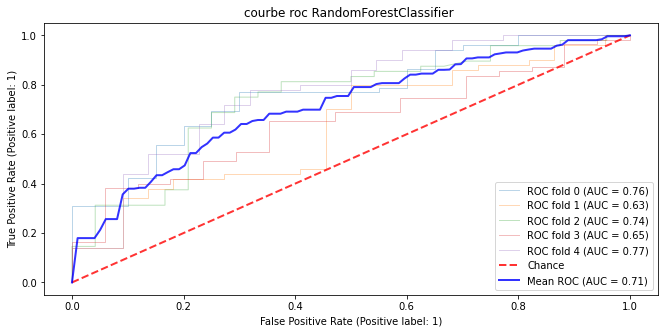

Accuracy: [0.77777778 0.69444444 0.70833333 0.73611111 0.77777778]
moy_accuracy: 0.74
precision: [0.76470588 0.72727273 0.71428571 0.79365079 0.76190476]
moy_precision: 0.75
sensibilité : [1.         0.92       0.9375     0.90909091 0.96      ]
moy_sensibilité: 0.95
spécificité : [0.2        0.18181818 0.25       0.17647059 0.36363636]
moy_spécificité: 0.23
MCC : [0.31850685 0.05330018 0.3125     0.03832909 0.43107994]
MCC: 0.23
balanced_accuracy : [0.6        0.53818182 0.58333333 0.51336898 0.66181818]
balanced_accuracy: 0.58
roc_auc : [0.75192308 0.63909091 0.73741319 0.6684492  0.76636364]
roc_auc: 0.71
cohen_kappa_scorec : [0.26530612 0.12389381 0.26829268 0.13020134 0.33333333]
cohen_kappa_scorec: 0.22
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

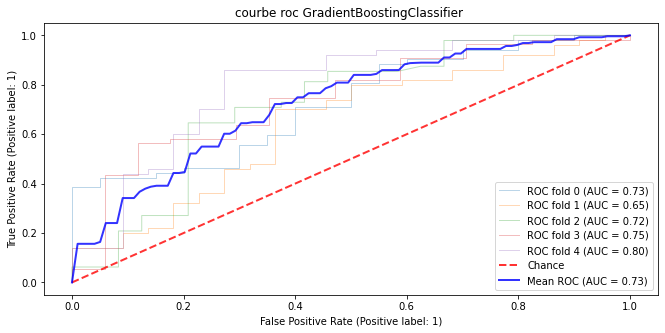

Accuracy: [0.73611111 0.68055556 0.70833333 0.76388889 0.76388889]
moy_accuracy: 0.73
precision: [0.7704918  0.73684211 0.73684211 0.82758621 0.81132075]
moy_precision: 0.78
sensibilité : [0.90384615 0.84       0.875      0.87272727 0.86      ]
moy_sensibilité: 0.87
spécificité : [0.3        0.31818182 0.375      0.41176471 0.54545455]
moy_spécificité: 0.39
MCC : [0.25378031 0.17941959 0.2901905  0.30527962 0.42376373]
MCC: 0.29
balanced_accuracy : [0.60192308 0.57909091 0.625      0.64224599 0.70272727]
balanced_accuracy: 0.63
roc_auc : [0.72596154 0.64545455 0.72352431 0.74545455 0.79545455]
roc_auc: 0.73
cohen_kappa_scorec : [0.23660714 0.17365269 0.27586207 0.30296128 0.42155009]
cohen_kappa_scorec: 0.28
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

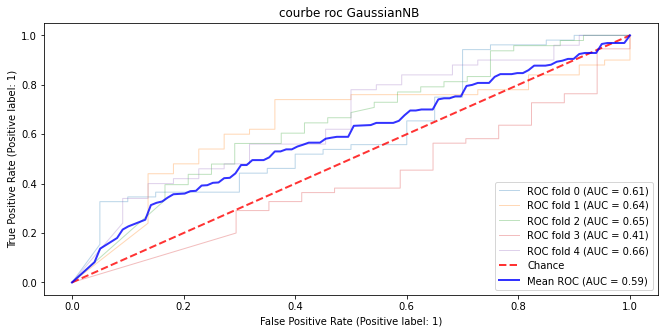

Accuracy: [0.5        0.625      0.55555556 0.38888889 0.52777778]
moy_accuracy: 0.52
precision: [0.86363636 0.82857143 0.80769231 0.73913043 0.80769231]
moy_precision: 0.81
sensibilité : [0.36538462 0.58       0.4375     0.30909091 0.42      ]
moy_sensibilité: 0.42
spécificité : [0.85       0.72727273 0.79166667 0.64705882 0.77272727]
moy_spécificité: 0.76
MCC : [ 0.20942813  0.28319493  0.22491173 -0.03994074  0.18483062]
MCC: 0.17
balanced_accuracy : [0.60769231 0.65363636 0.61458333 0.47807487 0.59636364]
balanced_accuracy: 0.59
roc_auc : [0.60865385 0.64       0.64539931 0.40695187 0.65636364]
roc_auc: 0.59
cohen_kappa_scorec : [ 0.14736842  0.25801527  0.18644068 -0.02657161  0.14763231]
cohen_kappa_scorec: 0.14
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

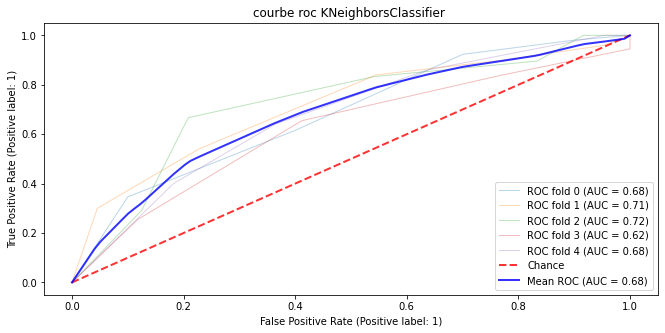

Accuracy: [0.75       0.72222222 0.70833333 0.69444444 0.70833333]
moy_accuracy: 0.72
precision: [0.77419355 0.77777778 0.75471698 0.77966102 0.75438596]
moy_precision: 0.77
sensibilité : [0.92307692 0.84       0.83333333 0.83636364 0.86      ]
moy_sensibilité: 0.86
spécificité : [0.3        0.45454545 0.45833333 0.23529412 0.36363636]
moy_spécificité: 0.36
MCC : [0.28891858 0.31333978 0.31195956 0.07911727 0.25366217]
MCC: 0.25
balanced_accuracy : [0.61153846 0.64727273 0.64583333 0.53582888 0.61181818]
balanced_accuracy: 0.61
roc_auc : [0.68173077 0.71409091 0.72265625 0.62139037 0.67681818]
roc_auc: 0.68
cohen_kappa_scorec : [0.26363636 0.31034483 0.30769231 0.07799767 0.24550898]
cohen_kappa_scorec: 0.24


In [41]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X, Y)):
         clf.fit( X.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  X.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# Données équilibrées

In [32]:
Cl1 = '/content/cx_pipiens.xlsx' 
data1= pd.read_excel(Cl1, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [33]:
del data1["Source"] 
del data1["CodeSite"] 
data1

,X_long,Y_lat,Cx_pipiens,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,1,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,1,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,1,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,1,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
207,-6.03333

In [34]:
X1 = data1.loc[:, data1.columns != 'Cx_pipiens']
Y1= data1.Cx_pipiens

In [35]:
X1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
4,-13.207000,27.165000,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.400000,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,-5.333333,35.266667,11.136305,139.052841,8.974447,27.155428,0.614620,0,0,0,0,0,0,0,0,100,0,0,1910,470,130,70,66,5,2,73,1480,2470,782,123,212,0,14998,628,105,12,92,3,0,95,...,25.799999,21.200001,17.799999,14.500000,3.8,4.7,7.1,9.7,11.900000,16.500000,21.500000,21.100000,17.900000,13.400000,9.900000,6.6,0.90,0.95,1.00,1.07,1.24,1.46,1.60,1.67,1.56,1.35,1.11,0.99,3.3,3.5,3.6,3.8,3.4,3.5,3.3,3.0,3.1,3.3,3.2,3.1
206,-5.218206,35.348765,24.167864,101.951973,6.131610,13.230689,0.796660,0,0,0,23,13,14,11,7,31,0,0,1790,300,70,20,67,4,0,71,1450,2080,610,216,377,0,14747,538,85,13,91,2,0,93,...,24.600000,18.799999,15.400000,12.700000,3.6,4.2,6.3,8.9,11.400000,15.500000,19.900000,19.799999,17.400000,11.600000,8.200000,5.5,0.84,0.88,0.92,0.99,1.13,1.32,1.45,1.53,1.44,1.25,1.04,0.94,4.0,4.7,5.0,4.6,4.2,3.5,3.5,3.6,4.0,4.3,3.9,3.8
20

In [36]:
Y1

0      0
1      0
2      0
3      1
4      1
      ..
205    1
206    1
207    1
208    1
209    1
Name: Cx_pipiens, Length: 210, dtype: int64

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

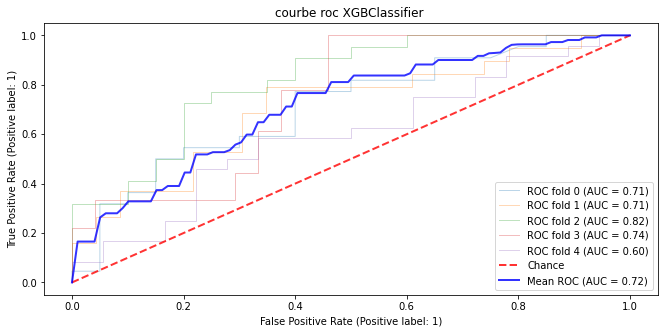

Accuracy: [0.66666667 0.69047619 0.73809524 0.64285714 0.5952381 ]
moy_accuracy: 0.67
precision: [0.66666667 0.65       0.76190476 0.57142857 0.70588235]
moy_precision: 0.67
sensibilité : [0.72727273 0.68421053 0.72727273 0.66666667 0.5       ]
moy_sensibilité: 0.66
spécificité : [0.6        0.69565217 0.75       0.625      0.72222222]
moy_spécificité: 0.68
MCC : [0.33028913 0.3785655  0.47673129 0.28867513 0.22404481]
MCC: 0.34
balanced_accuracy : [0.66363636 0.68993135 0.73863636 0.64583333 0.61111111]
balanced_accuracy: 0.67
roc_auc : [0.71022727 0.70709382 0.81818182 0.74305556 0.59722222]
roc_auc: 0.72
cohen_kappa_scorec : [0.32876712 0.37813212 0.47619048 0.28571429 0.21192053]
cohen_kappa_scorec: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

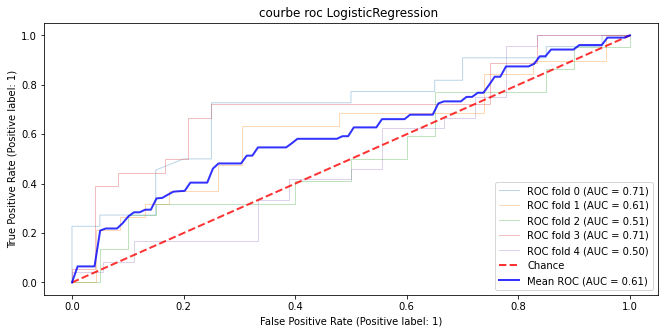

Accuracy: [0.69047619 0.61904762 0.47619048 0.71428571 0.5       ]
moy_accuracy: 0.60
precision: [0.71428571 0.58823529 0.5        0.66666667 0.58823529]
moy_precision: 0.61
sensibilité : [0.68181818 0.52631579 0.45454545 0.66666667 0.41666667]
moy_sensibilité: 0.55
spécificité : [0.7        0.69565217 0.5        0.75       0.61111111]
moy_spécificité: 0.65
MCC : [ 0.38138504  0.22507982 -0.04545455  0.41666667  0.0280056 ]
MCC: 0.20
balanced_accuracy : [0.69090909 0.61098398 0.47727273 0.70833333 0.51388889]
balanced_accuracy: 0.60
roc_auc : [0.70568182 0.61098398 0.51363636 0.69675926 0.5       ]
roc_auc: 0.61
cohen_kappa_scorec : [ 0.38095238  0.22401848 -0.04524887  0.41666667  0.02649007]
cohen_kappa_scorec: 0.20
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

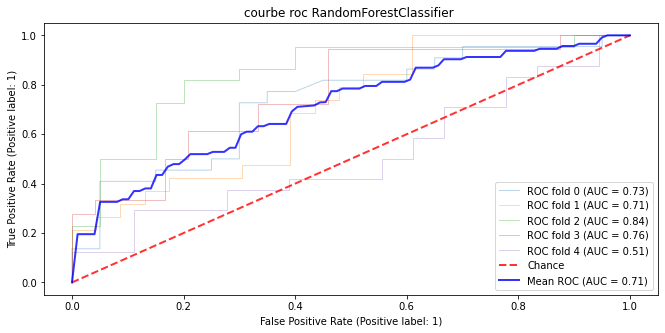

Accuracy: [0.69047619 0.57142857 0.71428571 0.69047619 0.54761905]
moy_accuracy: 0.64
precision: [0.70833333 0.55555556 0.72727273 0.59090909 0.63636364]
moy_precision: 0.64
sensibilité : [0.77272727 0.57894737 0.68181818 0.66666667 0.45833333]
moy_sensibilité: 0.63
spécificité : [0.65       0.65217391 0.75       0.70833333 0.5       ]
moy_spécificité: 0.65
MCC : [ 0.37924778  0.17951966  0.47434713  0.34405118 -0.0138092 ]
MCC: 0.27
balanced_accuracy : [0.68636364 0.63729977 0.76136364 0.6875     0.47916667]
balanced_accuracy: 0.65
roc_auc : [0.75568182 0.67505721 0.82727273 0.78009259 0.52314815]
roc_auc: 0.71
cohen_kappa_scorec : [ 0.4738041   0.17931034  0.42986425  0.32876712 -0.04054054]
cohen_kappa_scorec: 0.27
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

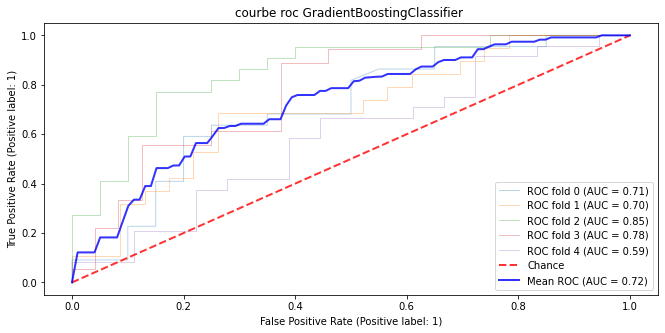

Accuracy: [0.66666667 0.69047619 0.78571429 0.66666667 0.54761905]
moy_accuracy: 0.67
precision: [0.68181818 0.66666667 0.80952381 0.59090909 0.66666667]
moy_precision: 0.68
sensibilité : [0.68181818 0.63157895 0.77272727 0.72222222 0.41666667]
moy_sensibilité: 0.65
spécificité : [0.65       0.73913043 0.8        0.625      0.72222222]
moy_spécificité: 0.71
MCC : [0.33181818 0.37284852 0.57207755 0.34405118 0.14344383]
MCC: 0.35
balanced_accuracy : [0.66590909 0.68535469 0.78636364 0.67361111 0.56944444]
balanced_accuracy: 0.68
roc_auc : [0.70568182 0.69565217 0.85454545 0.77777778 0.58796296]
roc_auc: 0.72
cohen_kappa_scorec : [0.33181818 0.37241379 0.57142857 0.33783784 0.13071895]
cohen_kappa_scorec: 0.35
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

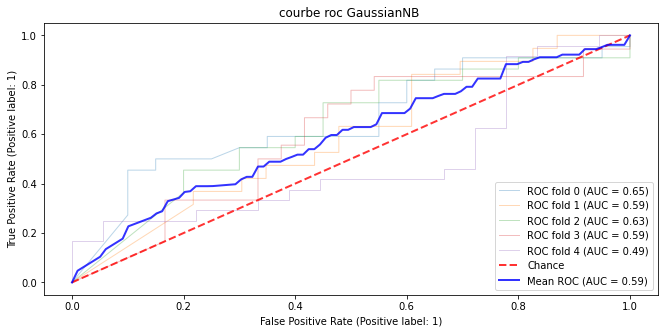

Accuracy: [0.5952381  0.57142857 0.57142857 0.57142857 0.45238095]
moy_accuracy: 0.55
precision: [0.63157895 0.54545455 0.59090909 0.5        0.53846154]
moy_precision: 0.56
sensibilité : [0.54545455 0.31578947 0.59090909 0.33333333 0.29166667]
moy_sensibilité: 0.42
spécificité : [0.65       0.7826087  0.55       0.75       0.66666667]
moy_spécificité: 0.68
MCC : [ 0.19612429  0.11139111  0.14090909  0.09128709 -0.04460258]
MCC: 0.10
balanced_accuracy : [0.59772727 0.54919908 0.57045455 0.54166667 0.47916667]
balanced_accuracy: 0.55
roc_auc : [0.65340909 0.59267735 0.62954545 0.59490741 0.48842593]
roc_auc: 0.59
cohen_kappa_scorec : [ 0.19413093  0.10213777  0.14090909  0.08695652 -0.03870968]
cohen_kappa_scorec: 0.10
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

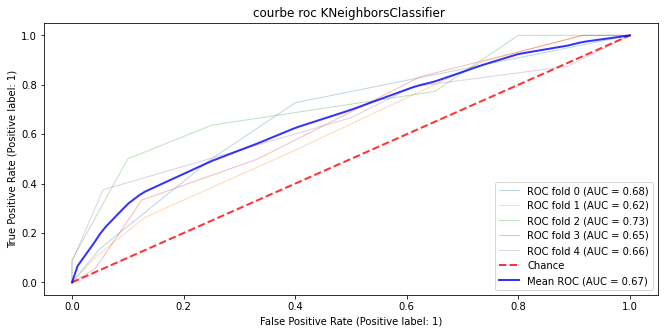

Accuracy: [0.66666667 0.57142857 0.69047619 0.5952381  0.5952381 ]
moy_accuracy: 0.62
precision: [0.66666667 0.52631579 0.73684211 0.52941176 0.64      ]
moy_precision: 0.62
sensibilité : [0.72727273 0.52631579 0.63636364 0.5        0.66666667]
moy_sensibilité: 0.61
spécificité : [0.6        0.60869565 0.75       0.66666667 0.5       ]
moy_spécificité: 0.63
MCC : [0.33028913 0.13501144 0.38768756 0.16803361 0.16803361]
MCC: 0.24
balanced_accuracy : [0.66363636 0.56750572 0.69318182 0.58333333 0.58333333]
balanced_accuracy: 0.62
roc_auc : [0.67727273 0.6201373  0.72954545 0.64930556 0.66087963]
roc_auc: 0.67
cohen_kappa_scorec : [0.32876712 0.13501144 0.38374718 0.16783217 0.16783217]
cohen_kappa_scorec: 0.24


In [42]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

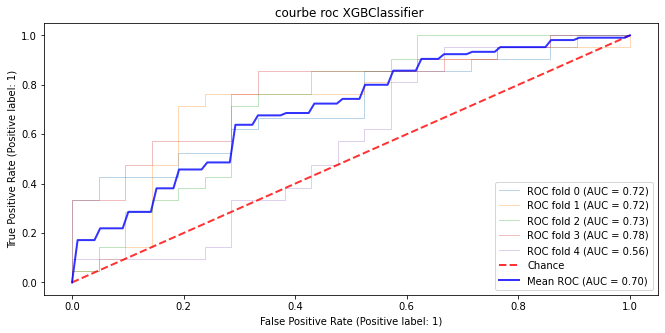

Accuracy: [0.66666667 0.76190476 0.69047619 0.71428571 0.5       ]
moy_accuracy: 0.67
precision: [0.66666667 0.76190476 0.68181818 0.71428571 0.5       ]
moy_precision: 0.66
sensibilité : [0.66666667 0.76190476 0.71428571 0.71428571 0.47619048]
moy_sensibilité: 0.67
spécificité : [0.66666667 0.76190476 0.66666667 0.71428571 0.52380952]
moy_spécificité: 0.67
MCC : [0.33333333 0.52380952 0.38138504 0.42857143 0.        ]
MCC: 0.33
balanced_accuracy : [0.66666667 0.76190476 0.69047619 0.71428571 0.5       ]
balanced_accuracy: 0.67
roc_auc : [0.71655329 0.72335601 0.73015873 0.77777778 0.56462585]
roc_auc: 0.70
cohen_kappa_scorec : [0.33333333 0.52380952 0.38095238 0.42857143 0.        ]
cohen_kappa_scorec: 0.33
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

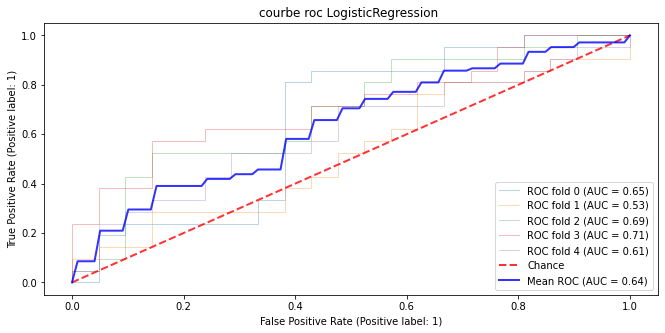

Accuracy: [0.64285714 0.47619048 0.64285714 0.64285714 0.5952381 ]
moy_accuracy: 0.60
precision: [0.63636364 0.47058824 0.60714286 0.65       0.6       ]
moy_precision: 0.59
sensibilité : [0.66666667 0.38095238 0.80952381 0.61904762 0.57142857]
moy_sensibilité: 0.61
spécificité : [0.61904762 0.57142857 0.47619048 0.66666667 0.61904762]
moy_spécificité: 0.59
MCC : [ 0.28603878 -0.04850713  0.30304576  0.28603878  0.19069252]
MCC: 0.20
balanced_accuracy : [0.64285714 0.47619048 0.64285714 0.64285714 0.5952381 ]
balanced_accuracy: 0.60
roc_auc : [0.64399093 0.53287982 0.6893424  0.70294785 0.61904762]
roc_auc: 0.64
cohen_kappa_scorec : [ 0.28571429 -0.04761905  0.28571429  0.28571429  0.19047619]
cohen_kappa_scorec: 0.20
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

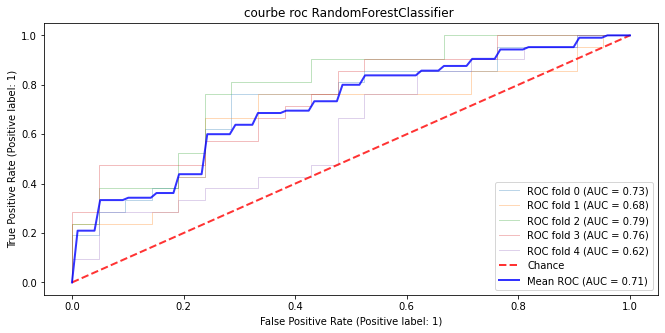

Accuracy: [0.69047619 0.69047619 0.69047619 0.64285714 0.57142857]
moy_accuracy: 0.66
precision: [0.65217391 0.72727273 0.68       0.7        0.57142857]
moy_precision: 0.67
sensibilité : [0.66666667 0.71428571 0.80952381 0.66666667 0.61904762]
moy_sensibilité: 0.70
spécificité : [0.61904762 0.66666667 0.57142857 0.66666667 0.52380952]
moy_spécificité: 0.61
MCC : [0.38138504 0.47673129 0.3478328  0.33333333 0.14350946]
MCC: 0.34
balanced_accuracy : [0.71428571 0.71428571 0.71428571 0.66666667 0.57142857]
balanced_accuracy: 0.68
roc_auc : [0.69160998 0.68027211 0.75283447 0.79138322 0.62131519]
roc_auc: 0.71
cohen_kappa_scorec : [0.42857143 0.42857143 0.38095238 0.23809524 0.14285714]
cohen_kappa_scorec: 0.32
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

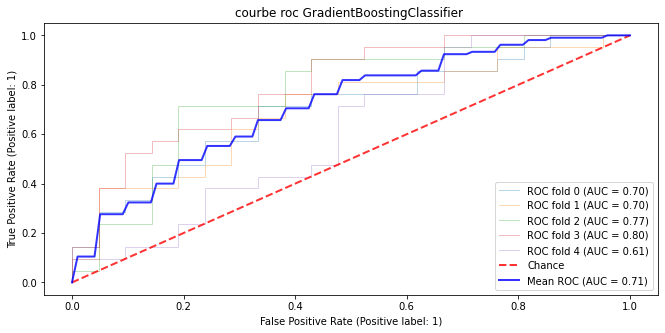

Accuracy: [0.64285714 0.66666667 0.71428571 0.66666667 0.5       ]
moy_accuracy: 0.64
precision: [0.65       0.65217391 0.66666667 0.68421053 0.5       ]
moy_precision: 0.63
sensibilité : [0.61904762 0.71428571 0.85714286 0.61904762 0.47619048]
moy_sensibilité: 0.66
spécificité : [0.66666667 0.61904762 0.57142857 0.71428571 0.52380952]
moy_spécificité: 0.62
MCC : [0.28603878 0.33485541 0.4472136  0.33485541 0.        ]
MCC: 0.28
balanced_accuracy : [0.64285714 0.66666667 0.71428571 0.66666667 0.5       ]
balanced_accuracy: 0.64
roc_auc : [0.70068027 0.70068027 0.76643991 0.79591837 0.60770975]
roc_auc: 0.71
cohen_kappa_scorec : [0.28571429 0.33333333 0.42857143 0.33333333 0.        ]
cohen_kappa_scorec: 0.28
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

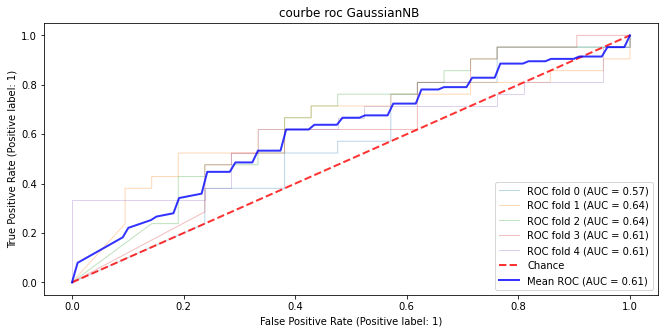

Accuracy: [0.54761905 0.64285714 0.57142857 0.54761905 0.5952381 ]
moy_accuracy: 0.58
precision: [0.58333333 0.71428571 0.55172414 0.58333333 0.625     ]
moy_precision: 0.61
sensibilité : [0.33333333 0.47619048 0.76190476 0.33333333 0.47619048]
moy_sensibilité: 0.48
spécificité : [0.76190476 0.80952381 0.38095238 0.76190476 0.71428571]
moy_spécificité: 0.69
MCC : [0.10540926 0.30304576 0.15450786 0.10540926 0.19611614]
MCC: 0.17
balanced_accuracy : [0.54761905 0.64285714 0.57142857 0.54761905 0.5952381 ]
balanced_accuracy: 0.58
roc_auc : [0.56575964 0.63718821 0.64285714 0.60544218 0.60997732]
roc_auc: 0.61
cohen_kappa_scorec : [0.0952381  0.28571429 0.14285714 0.0952381  0.19047619]
cohen_kappa_scorec: 0.16
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

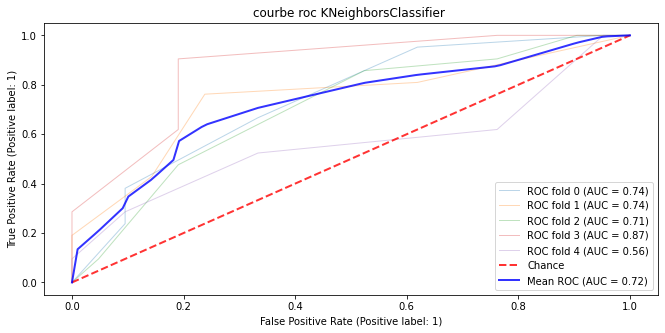

Accuracy: [0.66666667 0.76190476 0.66666667 0.71428571 0.5952381 ]
moy_accuracy: 0.68
precision: [0.66666667 0.76190476 0.62068966 0.76470588 0.61111111]
moy_precision: 0.69
sensibilité : [0.66666667 0.76190476 0.85714286 0.61904762 0.52380952]
moy_sensibilité: 0.69
spécificité : [0.66666667 0.76190476 0.47619048 0.80952381 0.66666667]
moy_spécificité: 0.68
MCC : [0.33333333 0.52380952 0.36051834 0.43656413 0.19245009]
MCC: 0.37
balanced_accuracy : [0.66666667 0.76190476 0.66666667 0.71428571 0.5952381 ]
balanced_accuracy: 0.68
roc_auc : [0.74036281 0.74489796 0.70634921 0.86848073 0.56122449]
roc_auc: 0.72
cohen_kappa_scorec : [0.33333333 0.52380952 0.33333333 0.42857143 0.19047619]
cohen_kappa_scorec: 0.36


In [38]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

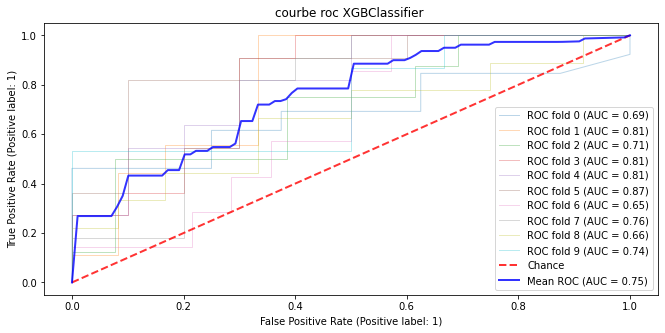

Accuracy: [0.61904762 0.80952381 0.66666667 0.61904762 0.71428571 0.76190476
 0.61904762 0.71428571 0.57142857 0.61904762]
moy_accuracy: 0.67
precision: [0.69230769 0.69230769 0.54545455 0.66666667 0.77777778 0.875
 0.46153846 0.72727273 0.5        1.        ]
moy_precision: 0.69
sensibilité : [0.69230769 1.         0.75       0.54545455 0.63636364 0.63636364
 0.85714286 0.72727273 0.77777778 0.46666667]
moy_sensibilité: 0.71
spécificité : [0.5        0.66666667 0.61538462 0.7        0.8        0.9
 0.5        0.7        0.41666667 1.        ]
moy_spécificité: 0.68
MCC : [0.19230769 0.67936622 0.35527986 0.24771685 0.44038551 0.55161872
 0.34668762 0.42727273 0.20412415 0.4472136 ]
MCC: 0.39
balanced_accuracy : [0.59615385 0.83333333 0.68269231 0.62272727 0.71818182 0.76818182
 0.67857143 0.71363636 0.59722222 0.73333333]
balanced_accuracy: 0.69
roc_auc : [0.6875     0.80555556 0.71153846 0.80909091 0.80909091 0.87272727
 0.65306122 0.76363636 0.65740741 0.74444444]
roc_auc: 0.75
cohen

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

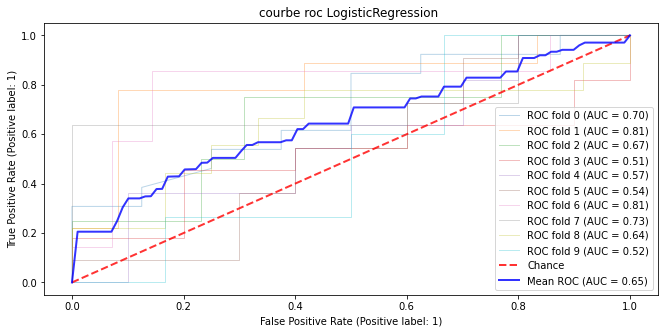

Accuracy: [0.66666667 0.76190476 0.66666667 0.57142857 0.52380952 0.38095238
 0.71428571 0.71428571 0.66666667 0.38095238]
moy_accuracy: 0.60
precision: [0.71428571 0.83333333 0.54545455 0.625      0.53333333 0.375
 0.54545455 0.77777778 0.58333333 0.75      ]
moy_precision: 0.63
sensibilité : [0.76923077 0.55555556 0.75       0.45454545 0.72727273 0.27272727
 0.85714286 0.63636364 0.77777778 0.2       ]
moy_sensibilité: 0.60
spécificité : [0.5        0.91666667 0.61538462 0.7        0.3        0.5
 0.64285714 0.8        0.58333333 0.83333333]
moy_spécificité: 0.64
MCC : [ 0.2773501   0.51729353  0.35527986  0.15894099  0.03015113 -0.23373675
  0.4719399   0.44038551  0.36111111  0.03834825]
MCC: 0.24
balanced_accuracy : [0.63461538 0.73611111 0.68269231 0.57727273 0.51363636 0.38636364
 0.75       0.71818182 0.68055556 0.51666667]
balanced_accuracy: 0.62
roc_auc : [0.69711538 0.81481481 0.67307692 0.51818182 0.61818182 0.46363636
 0.79591837 0.73636364 0.62037037 0.52222222]
roc_auc: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

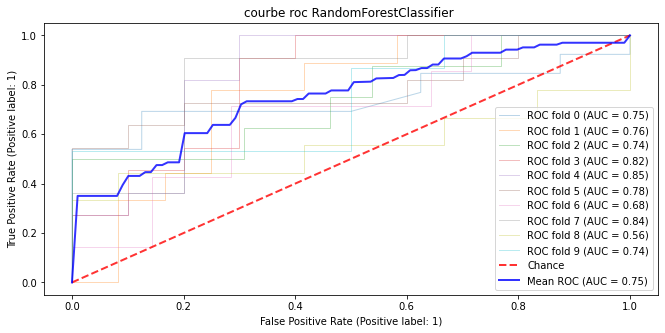

Accuracy: [0.66666667 0.71428571 0.61904762 0.71428571 0.9047619  0.80952381
 0.66666667 0.71428571 0.42857143 0.61904762]
moy_accuracy: 0.69
precision: [0.9        0.61538462 0.55555556 0.71428571 0.83333333 0.8
 0.41666667 0.8        0.4        1.        ]
moy_precision: 0.70
sensibilité : [0.61538462 0.88888889 0.5        0.63636364 0.81818182 0.63636364
 0.71428571 0.63636364 0.66666667 0.53333333]
moy_sensibilité: 0.66
spécificité : [0.625      0.58333333 0.61538462 0.7        0.8        0.8
 0.42857143 0.8        0.33333333 1.        ]
moy_spécificité: 0.67
MCC : [ 0.23373675  0.48121774  0.31137618  0.15894099  0.82275335  0.44038551
  0.26967994  0.44038551 -0.09128709  0.33471934]
MCC: 0.34
balanced_accuracy : [0.72115385 0.73611111 0.55769231 0.62272727 0.85454545 0.71818182
 0.60714286 0.71818182 0.45833333 0.7       ]
balanced_accuracy: 0.67
roc_auc : [0.71634615 0.81481481 0.72115385 0.78181818 0.87272727 0.81818182
 0.68367347 0.81818182 0.61111111 0.73333333]
roc_auc: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

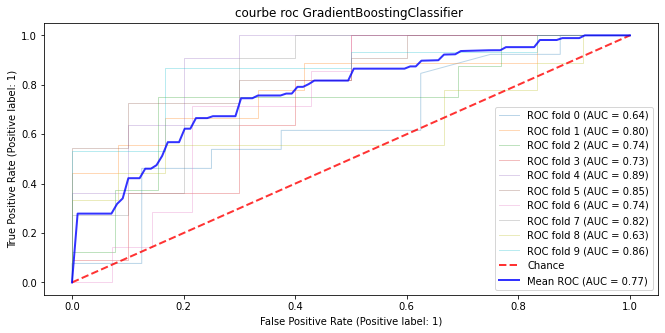

Accuracy: [0.57142857 0.71428571 0.76190476 0.61904762 0.80952381 0.76190476
 0.66666667 0.66666667 0.47619048 0.66666667]
moy_accuracy: 0.67
precision: [0.7        0.63636364 0.66666667 0.63636364 0.81818182 0.875
 0.5        0.7        0.41666667 1.        ]
moy_precision: 0.69
sensibilité : [0.53846154 0.77777778 0.75       0.63636364 0.81818182 0.63636364
 0.85714286 0.63636364 0.55555556 0.53333333]
moy_sensibilité: 0.67
spécificité : [0.625      0.66666667 0.76923077 0.6        0.8        0.9
 0.57142857 0.7        0.41666667 1.        ]
moy_spécificité: 0.70
MCC : [ 0.15894099  0.44038551  0.50952467  0.23636364  0.61818182  0.55161872
  0.40824829  0.33636364 -0.02777778  0.49613894]
MCC: 0.37
balanced_accuracy : [0.58173077 0.72222222 0.75961538 0.61818182 0.80909091 0.76818182
 0.71428571 0.66818182 0.48611111 0.76666667]
balanced_accuracy: 0.69
roc_auc : [0.63942308 0.7962963  0.74038462 0.72727273 0.89090909 0.85454545
 0.74489796 0.81818182 0.62962963 0.85555556]
roc_auc: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

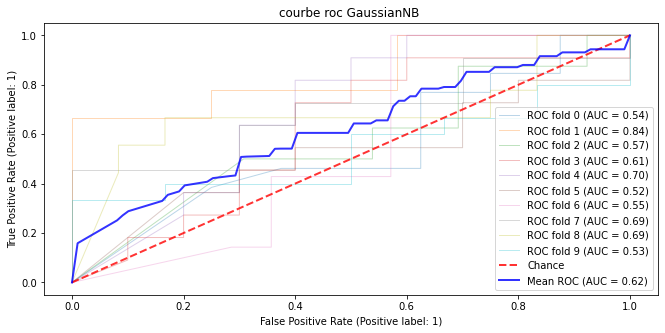

Accuracy: [0.52380952 0.76190476 0.61904762 0.52380952 0.66666667 0.52380952
 0.52380952 0.66666667 0.71428571 0.38095238]
moy_accuracy: 0.59
precision: [0.71428571 0.75       0.5        0.6        0.7        0.54545455
 0.2        0.83333333 0.66666667 1.        ]
moy_precision: 0.65
sensibilité : [0.38461538 0.66666667 0.5        0.27272727 0.63636364 0.54545455
 0.14285714 0.45454545 0.66666667 0.13333333]
moy_sensibilité: 0.44
spécificité : [0.75       0.83333333 0.69230769 0.8        0.7        0.5
 0.71428571 0.9        0.75       1.        ]
moy_spécificité: 0.76
MCC : [ 0.13867505  0.50952467  0.19230769  0.08528029  0.33636364  0.04545455
 -0.15811388  0.39196475  0.41666667  0.20519567]
MCC: 0.22
balanced_accuracy : [0.56730769 0.75       0.59615385 0.53636364 0.66818182 0.52272727
 0.42857143 0.67727273 0.70833333 0.56666667]
balanced_accuracy: 0.60
roc_auc : [0.54326923 0.84259259 0.56730769 0.61363636 0.7        0.51818182
 0.55102041 0.69090909 0.68518519 0.53333333]
roc_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

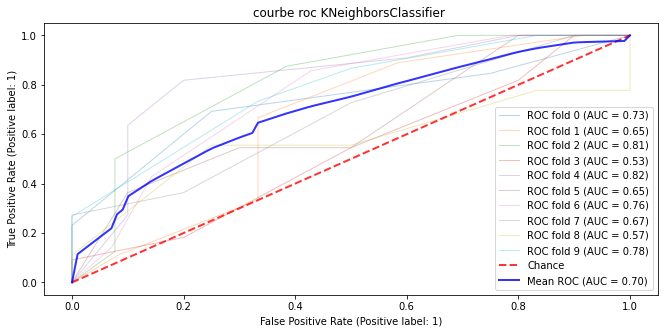

Accuracy: [0.66666667 0.66666667 0.71428571 0.52380952 0.80952381 0.61904762
 0.66666667 0.57142857 0.52380952 0.71428571]
moy_accuracy: 0.65
precision: [0.71428571 0.6        0.58333333 0.54545455 0.81818182 0.66666667
 0.5        0.66666667 0.45454545 0.84615385]
moy_precision: 0.64
sensibilité : [0.76923077 0.66666667 0.875      0.54545455 0.81818182 0.54545455
 0.85714286 0.36363636 0.55555556 0.73333333]
moy_sensibilité: 0.67
spécificité : [0.5        0.66666667 0.61538462 0.5        0.8        0.7
 0.57142857 0.8        0.5        0.66666667]
moy_spécificité: 0.63
MCC : [0.2773501  0.33028913 0.48121774 0.04545455 0.61818182 0.24771685
 0.40824829 0.18090681 0.05504819 0.3721042 ]
MCC: 0.30
balanced_accuracy : [0.63461538 0.66666667 0.74519231 0.52272727 0.80909091 0.62272727
 0.71428571 0.58181818 0.52777778 0.7       ]
balanced_accuracy: 0.65
roc_auc : [0.73076923 0.65277778 0.8125     0.53181818 0.82272727 0.65
 0.75510204 0.67272727 0.57407407 0.77777778]
roc_auc: 0.70
cohen_

In [39]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

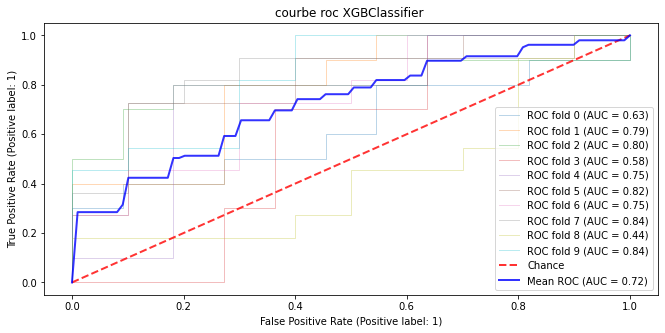

Accuracy: [0.61904762 0.71428571 0.76190476 0.66666667 0.71428571 0.66666667
 0.61904762 0.80952381 0.38095238 0.66666667]
moy_accuracy: 0.66
precision: [0.625      0.66666667 0.77777778 0.63636364 0.75       0.625
 0.66666667 0.88888889 0.42857143 0.7       ]
moy_precision: 0.68
sensibilité : [0.5        0.8        0.7        0.7        0.6        0.90909091
 0.54545455 0.72727273 0.54545455 0.63636364]
moy_sensibilité: 0.67
spécificité : [0.72727273 0.63636364 0.81818182 0.63636364 0.81818182 0.4
 0.7        0.9        0.2        0.7       ]
moy_spécificité: 0.65
MCC : [ 0.23373675  0.44038551  0.52295779  0.33636364  0.43007562  0.36244122
  0.24771685  0.63305416 -0.26967994  0.33636364]
MCC: 0.33
balanced_accuracy : [0.61363636 0.71818182 0.75909091 0.66818182 0.70909091 0.65454545
 0.62272727 0.81363636 0.37272727 0.66818182]
balanced_accuracy: 0.66
roc_auc : [0.62727273 0.79090909 0.8        0.58181818 0.74545455 0.81818182
 0.74545455 0.83636364 0.43636364 0.83636364]
roc_auc: 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (statu

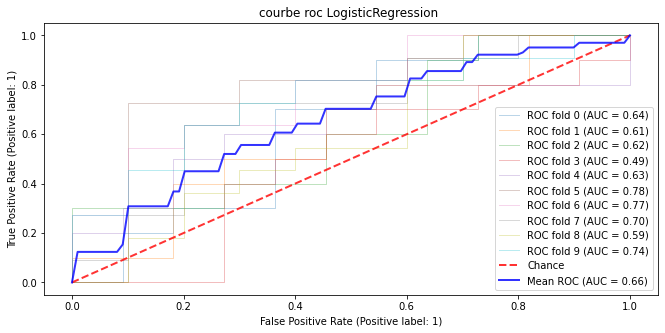

Accuracy: [0.66666667 0.61904762 0.42857143 0.52380952 0.66666667 0.61904762
 0.66666667 0.71428571 0.52380952 0.76190476]
moy_accuracy: 0.62
precision: [0.63636364 0.6        0.4        0.5        0.66666667 0.6
 0.75       0.72727273 0.55555556 0.8       ]
moy_precision: 0.62
sensibilité : [0.7        0.6        0.4        0.5        0.6        0.81818182
 0.54545455 0.72727273 0.45454545 0.72727273]
moy_sensibilité: 0.61
spécificité : [0.63636364 0.63636364 0.45454545 0.54545455 0.72727273 0.4
 0.8        0.7        0.6        0.8       ]
moy_spécificité: 0.63
MCC : [ 0.33636364  0.23636364 -0.14545455  0.04545455  0.33028913  0.24120908
  0.35527986  0.42727273  0.05504819  0.52727273]
MCC: 0.24
balanced_accuracy : [0.66818182 0.61818182 0.42727273 0.52272727 0.66363636 0.60909091
 0.67272727 0.71363636 0.52727273 0.76363636]
balanced_accuracy: 0.62
roc_auc : [0.65454545 0.61818182 0.6        0.49090909 0.66363636 0.78181818
 0.77272727 0.67272727 0.59090909 0.74545455]
roc_auc: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

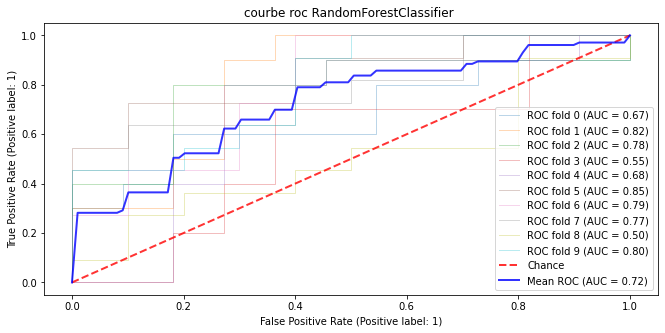

Accuracy: [0.66666667 0.76190476 0.85714286 0.61904762 0.61904762 0.61904762
 0.66666667 0.71428571 0.47619048 0.66666667]
moy_accuracy: 0.67
precision: [0.66666667 0.75       0.8        0.58333333 0.66666667 0.58823529
 0.72727273 0.8        0.46666667 0.66666667]
moy_precision: 0.67
sensibilité : [0.5        0.8        0.9        0.7        0.6        0.90909091
 0.63636364 0.63636364 0.63636364 0.54545455]
moy_sensibilité: 0.69
spécificité : [0.81818182 0.72727273 0.72727273 0.54545455 0.72727273 0.3
 0.7        0.8        0.2        0.7       ]
moy_spécificité: 0.62
MCC : [ 0.33709993  0.63305416  0.63305416  0.24771685  0.33028913  0.26593594
  0.33028913  0.44038551 -0.26967994  0.44038551]
MCC: 0.34
balanced_accuracy : [0.65909091 0.71363636 0.85909091 0.57727273 0.71363636 0.60454545
 0.66363636 0.66818182 0.42272727 0.71818182]
balanced_accuracy: 0.66
roc_auc : [0.71818182 0.80909091 0.79090909 0.58181818 0.67272727 0.79090909
 0.78181818 0.78181818 0.48181818 0.80909091]
roc_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

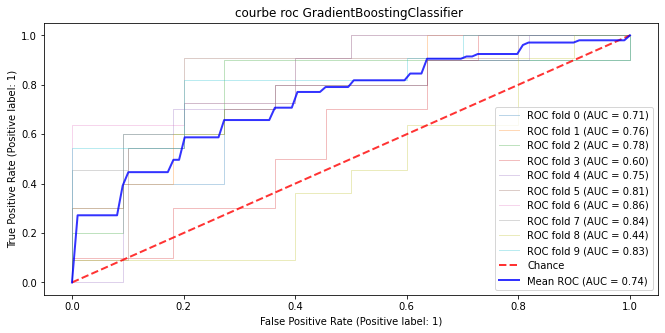

Accuracy: [0.66666667 0.71428571 0.80952381 0.57142857 0.71428571 0.71428571
 0.71428571 0.66666667 0.52380952 0.66666667]
moy_accuracy: 0.68
precision: [0.66666667 0.7        0.75       0.54545455 0.7        0.66666667
 0.72727273 0.75       0.53846154 0.75      ]
moy_precision: 0.68
sensibilité : [0.6        0.7        0.9        0.6        0.7        0.90909091
 0.72727273 0.54545455 0.63636364 0.54545455]
moy_sensibilité: 0.69
spécificité : [0.72727273 0.72727273 0.72727273 0.54545455 0.72727273 0.5
 0.7        0.8        0.4        0.8       ]
moy_spécificité: 0.67
MCC : [0.33028913 0.42727273 0.63305416 0.14545455 0.42727273 0.45226702
 0.42727273 0.35527986 0.03739788 0.35527986]
MCC: 0.36
balanced_accuracy : [0.66363636 0.71363636 0.81363636 0.57272727 0.71363636 0.70454545
 0.71363636 0.67272727 0.51818182 0.67272727]
balanced_accuracy: 0.68
roc_auc : [0.70909091 0.76363636 0.78181818 0.6        0.74545455 0.80909091
 0.86363636 0.83636364 0.43636364 0.82727273]
roc_auc: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

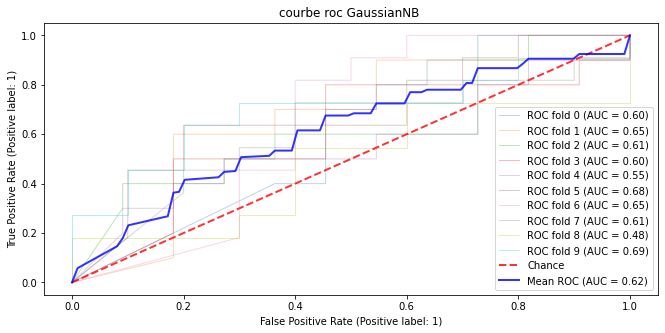

Accuracy: [0.47619048 0.57142857 0.61904762 0.57142857 0.42857143 0.61904762
 0.52380952 0.61904762 0.47619048 0.66666667]
moy_accuracy: 0.56
precision: [0.44444444 0.6        0.66666667 0.54545455 0.42857143 0.8
 0.57142857 0.66666667 0.5        0.75      ]
moy_precision: 0.60
sensibilité : [0.4        0.3        0.4        0.6        0.6        0.36363636
 0.36363636 0.54545455 0.18181818 0.54545455]
moy_sensibilité: 0.43
spécificité : [0.54545455 0.81818182 0.81818182 0.54545455 0.27272727 0.9
 0.7        0.7        0.8        0.8       ]
moy_spécificité: 0.69
MCC : [-0.05504819  0.13858047  0.24120908  0.14545455 -0.13483997  0.30914104
  0.06741999  0.24771685 -0.02312486  0.35527986]
MCC: 0.13
balanced_accuracy : [0.47272727 0.55909091 0.60909091 0.57272727 0.43636364 0.63181818
 0.53181818 0.62272727 0.49090909 0.67272727]
balanced_accuracy: 0.56
roc_auc : [0.6        0.65454545 0.61363636 0.6        0.55454545 0.68181818
 0.64545455 0.60909091 0.48181818 0.69090909]
roc_auc: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

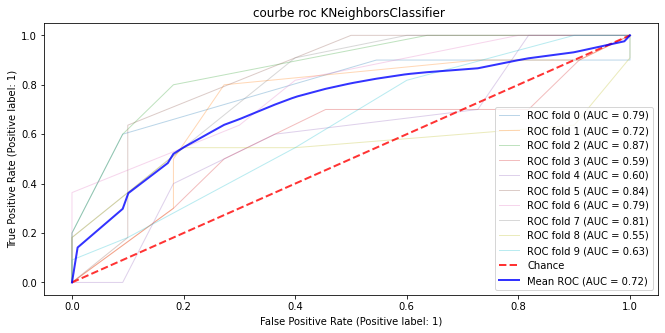

Accuracy: [0.76190476 0.76190476 0.80952381 0.61904762 0.61904762 0.76190476
 0.66666667 0.66666667 0.57142857 0.57142857]
moy_accuracy: 0.68
precision: [0.85714286 0.72727273 0.8        0.58333333 0.6        0.6875
 0.7        0.75       0.6        0.6       ]
moy_precision: 0.69
sensibilité : [0.6        0.8        0.8        0.7        0.6        1.
 0.63636364 0.54545455 0.54545455 0.54545455]
moy_sensibilité: 0.68
spécificité : [0.90909091 0.72727273 0.81818182 0.54545455 0.63636364 0.5
 0.7        0.8        0.6        0.6       ]
moy_spécificité: 0.68
MCC : [0.53935989 0.52727273 0.61818182 0.24771685 0.23636364 0.58630197
 0.33636364 0.35527986 0.14545455 0.14545455]
MCC: 0.37
balanced_accuracy : [0.75454545 0.76363636 0.80909091 0.62272727 0.61818182 0.75
 0.66818182 0.67272727 0.57272727 0.57272727]
balanced_accuracy: 0.68
roc_auc : [0.78636364 0.72272727 0.87272727 0.58636364 0.60454545 0.83636364
 0.78636364 0.80909091 0.55454545 0.63181818]
roc_auc: 0.72
cohen_kappa_scorec

In [40]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1,max_depth=7,n_estimators=1000,subsample=0.9, colsample_bytree=0.9),
"LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=5),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_features=2, max_depth=5, random_state=0,min_samples_leaf=2,subsample=1)
,
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=5)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value

my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)
cv = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( X1, Y1)):
         clf.fit( X1.loc[train,], Y1.loc[train,])
         viz = plot_roc_curve(clf,  X1.loc[test,], Y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  X1, Y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, Y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, Y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, Y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, Y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, X1, Y1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, X1, Y1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, X1, Y1, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))